In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
# Check the general information of the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
# Check the layout of the data frame to understand the values' patterns and formatting.
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# Finding the top 5 zipcodes for 911 calls:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [5]:
# Finding the top 5 township for 911 calls:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [6]:
# How many unique titles (types of calls) are in the data?
df['title'].nunique()

110

In [7]:
# Determine the category of the titled reason for each recorded call.
# df['title'].loc[0].split(':')[0]
df['category'] = df['title'].apply(lambda x: x.split(':')[0])
df['category'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: category, dtype: object

In [8]:
# What was the most common category for 911 calls?
df['category'].value_counts().head(1)

category
EMS    48877
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

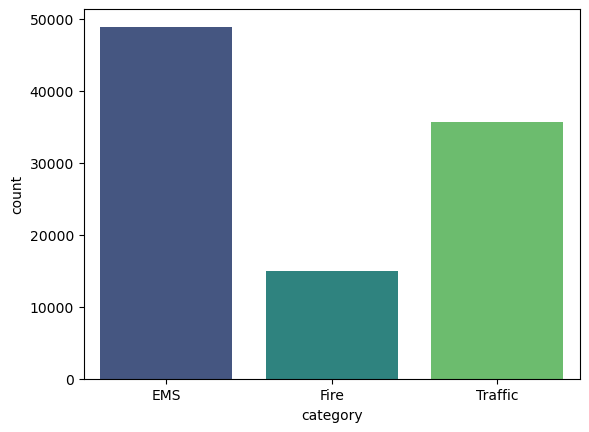

In [35]:
# Check the category variance visually.
sns.countplot(x='category',data=df,palette='viridis')

In [10]:
# Check the specific data type for the timestamp column objects to see if it's the proper format for further analysis.
type(df['timeStamp'].iloc[0])

str

In [11]:
# Coverting string timestamp data to datetime object.
# pd.to_datetime(df['timeStamp'].iloc[0])
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))
df['timeStamp'].head(5)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [28]:
# Create new time columns for further analysis.
# df['timeStamp'].iloc[0].month
df['month'] = df['timeStamp'].apply(lambda x: x.month)
print(df['month'].head(5))
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
print(df['hour'].head(5))
df['dow'] = df['timeStamp'].apply(lambda x: x.dayofweek)
print(df['dow'].head(5))

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64
0    17
1    17
2    17
3    17
4    17
Name: hour, dtype: int64
0    3
1    3
2    3
3    3
4    3
Name: dow, dtype: int64


In [29]:
# Since the dow (day of the week) is an integer, change it to a string value for the weekday.
dow_name = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['dow'] = df['dow'].map(dow_name)
df['dow'].head(5)

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: dow, dtype: object

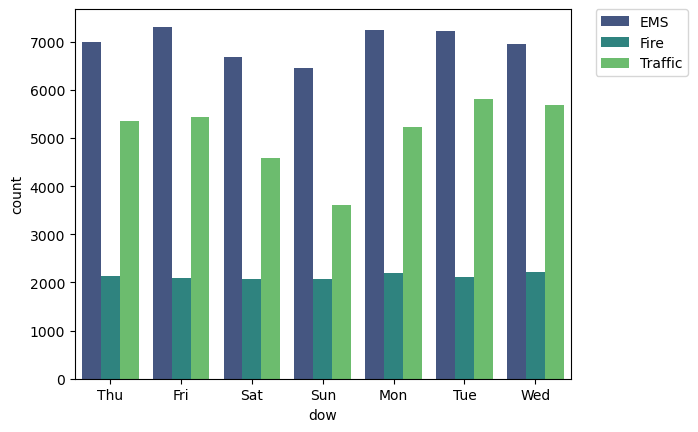

In [59]:
# Check for call variance throughout a week.
sns.countplot(x='dow',data=df,hue='category',palette='viridis')
# Relocate the legend location for better visibility.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

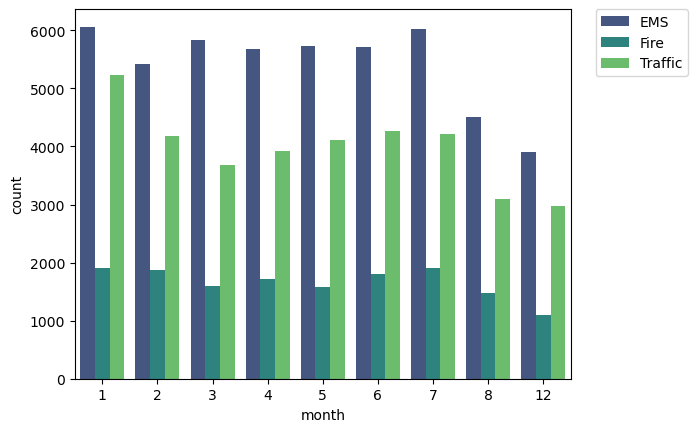

In [60]:
# Check for call variance throughout a month (based on the visualization, it's missing data for some months).
sns.countplot(x='month',data=df,hue='category',palette='viridis')
# Relocate the legend location for better visibility.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [65]:
# Find the count of the columns based on grouping by the 'month' column.
byMonth = df.groupby(by='month').count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,category,hour,dow
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='month'>

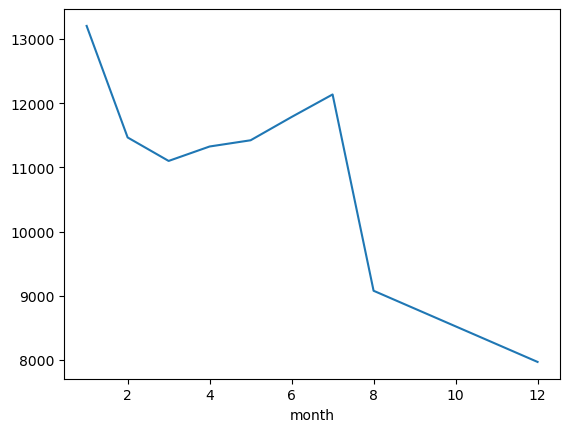

In [71]:
# Plot the findings from the previous groping and aggregation.
byMonth['lat'].plot()

In [74]:
# sns.lmplot(x='month',y='lat',data=byMonth['lat'])